In [69]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from scipy.stats import linregress
import sklearn.datasets as dta
import seaborn as sns

In [3]:
YT_data = pd.read_csv("us_youtube_data.csv")
YT_data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [19]:
print ("Rows     : " , YT_data.shape[0]) #Displays numbers of rows .
print ("Columns  : " , YT_data.shape[1]) # and column our dataset contains.
print ("\nFeatures : \n", YT_data.columns.tolist())#displays column names
print ("\nMissing values :  ", YT_data.isnull().sum().values.sum())   #find missing values
print ("\nUnique values :  \n", YT_data.nunique()) # Count distinct observations

Rows     :  66991
Columns  :  16

Features : 
 ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']

Missing values :   720

Unique values :  
 video_id             11055
title                11423
publishedAt          10977
channelId             3497
channelTitle          3543
categoryId              15
trending_date          315
tags                  8858
view_count           66123
likes                55741
dislikes             11515
comment_count        23051
thumbnail_link       11184
comments_disabled        2
ratings_disabled         2
description          11918
dtype: int64


In [20]:
YT_data.isna().sum()

video_id               0
title                  0
publishedAt            0
channelId              0
channelTitle           0
categoryId             0
trending_date          0
tags                   0
view_count             0
likes                  0
dislikes               0
comment_count          0
thumbnail_link         0
comments_disabled      0
ratings_disabled       0
description          720
dtype: int64

In [22]:
YT_data.describe().applymap('{:,.2f}'.format)

,categoryId,view_count,likes,dislikes,comment_count
count,"66,991.00","66,991.00","66,991.00","66,991.00","66,991.00"
mean,18.66,"2,852,040.44","153,846.16","3,366.86","15,484.56"
std,6.97,"6,610,673.03","419,391.64","14,451.48","109,127.68"
min,1.00,0.00,0.00,0.00,0.00
25%,10.00,"566,658.00","21,971.50",398.00,"1,933.00"
50%,20.00,"1,167,916.00","54,442.00",923.00,"4,373.00"
75%,24.00,"2,611,493.00","137,612.00","2,452.00","10,387.50"
max,29.00,"264,407,389.00","16,021,534.00","879,354.00","6,738,537.00"


In [28]:
#changing published date , trending_date to datetime datatype.
YT_data.publishedAt= pd.to_datetime(YT_data.publishedAt)
YT_data.trending_date= pd.to_datetime(YT_data.trending_date)
# Adding column for year to the dataframe
YT_data['Year']=YT_data['publishedAt'].dt.year
YT_data['Month']=YT_data['publishedAt'].dt.month
YT_data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,Year,Month
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,2020,8
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12 00:00:00+00:00,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",2020,8
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12 00:00:00+00:00,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,2020,8
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12 00:00:00+00:00,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,2020,8
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12 00:00:00+00:00,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,2020,8


In [74]:
like_view = YT_data[["view_count", "likes", "dislikes"]]
like_view

,view_count,likes,dislikes
0,1514614,156908,5855
1,2381688,146739,2794
2,2038853,353787,2628
3,496771,23251,1856
4,1123889,45802,964
...,...,...,...
66986,825587,50116,548
66987,6543887,473268,8453
66988,752290,63083,4202
66989,390279,3907,290


In [59]:
like_view.describe().applymap('{:,.2f}'.format)

,view_count,likes,dislikes
count,"66,991.00","66,991.00","66,991.00"
mean,"2,852,040.44","153,846.16","3,366.86"
std,"6,610,673.03","419,391.64","14,451.48"
min,0.00,0.00,0.00
25%,"566,658.00","21,971.50",398.00
50%,"1,167,916.00","54,442.00",923.00
75%,"2,611,493.00","137,612.00","2,452.00"
max,"264,407,389.00","16,021,534.00","879,354.00"


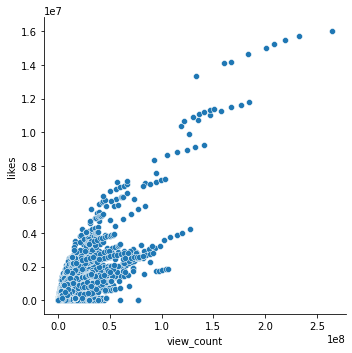

In [78]:
sns.relplot(data=like_view, x="view_count", y="likes");

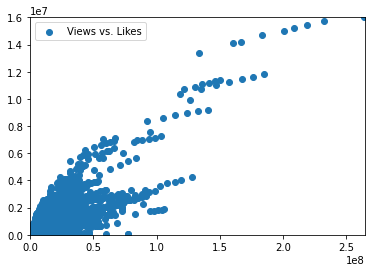

The correlation coefficient between View Counts and Likes is 0.85


In [84]:
views = like_view["view_count"]
likes = like_view['likes']

plt.scatter(views, likes, label = "Views vs. Likes")
plt.legend(loc='best')
plt.xlim(0, 265000000, 100000)
plt.ylim(0, 16000000, 100000)
plt.show()
print(f"The correlation coefficient between View Counts and Likes is {round(st.pearsonr(views,likes)[0],2)}")

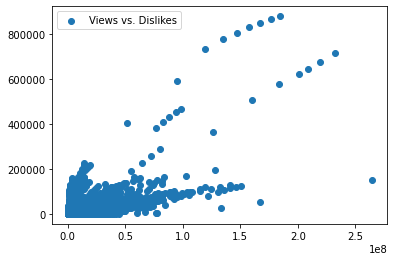

The correlation coefficient between View Counts and Dislikes is 0.7


In [51]:
views = like_view["view_count"]
dislikes = like_view['dislikes']

plt.scatter(views, dislikes, label = "Views vs. Dislikes")
plt.legend(loc='best')
plt.show()
print(f"The correlation coefficient between View Counts and Dislikes is {round(st.pearsonr(views,dislikes)[0],2)}")

In [79]:
x_values = like_view['view_count']
y_values = like_view['likes']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.0, (1.5),fontsize=10,color="red")
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($100,000)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

SyntaxError: invalid syntax (2669919100.py, line 8)

The r-squared is: 0.4896444452486275


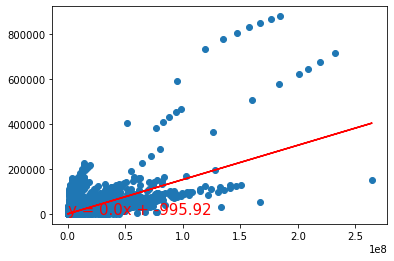

In [56]:
x_values = like_view['view_count']
y_values = like_view['dislikes']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1.5,0.5),fontsize=15,color="red")
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($100,000)')
print(f"The r-squared is: {rvalue**2}")
plt.show()